<a href="https://colab.research.google.com/github/PisanoRaffaele/Lab_AI/blob/main/rp-es5_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/Sapienza-AI-Lab/esercitazione5-22-23/blob/main/Linear_Regression.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

This Exercise is designed for the understanding of the usage of the basic packages and the concepts of Machine learning basics such as feature selection, Exploratory Data Analysis, Test-train split, some funtions for implementing simple linear regression and multiple linear regression.

## Import Libraries
Import the necessary libraries for Data Analysis (Pandas, Numpy), Plotting (Matplotlib, Seaborn) and Machine Learning (Scikit-Learn)

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset
If you are using colab, download the `auto-mpg.csv` from GitHub and upload into the runtime using the `upload` icon in the side bar of your colab.

Use the `read_csv()` function of pandas to load the data into the dataframe.

In [2]:
!wget -O auto-mpg.csv https://raw.githubusercontent.com/Sapienza-AI-Lab/esercitazione5-22-23/main/data/auto-mpg/auto-mpg.csv

df = pd.read_csv('auto-mpg.csv')

--2023-07-16 08:45:00--  https://raw.githubusercontent.com/Sapienza-AI-Lab/esercitazione5-22-23/main/data/auto-mpg/auto-mpg.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16688 (16K) [text/plain]
Saving to: ‘auto-mpg.csv’

auto-mpg.csv        100%[===================>]  16.30K  --.-KB/s    in 0.001s  

2023-07-16 08:45:01 (11.2 MB/s) - ‘auto-mpg.csv’ saved [16688/16688]



## Exploratory Data Analysis

Exploratory Data Analysis is an essential step in any machine learning or data analysis project. It helps us to understand the data and its underlying structure, identify patterns, relationships, and potential problems in the data. EDA also helps us to make informed decisions about data preprocessing, feature selection, and model building.

### Basic statistical analysis of the dataset

Once we have loaded the dataset, we can perform basic statistical analysis of the data using functions like describe(), info(), etc. These functions provide information about the data such as the number of rows, columns, data types, mean, standard deviation, minimum, maximum, etc.

Display the number of rows and columns of the dataset using the `shape` attribute of the dataframe.

Note: The shape is a tuple of (rows,columns), excluding the header.

In [4]:
df.shape

(318, 9)

Display the first 5 rows of the dataset using the `head()` function of pandas.

In [5]:
# Visualizza le prime 5 righe del dataframe
df.head()

MPG  CYL    DIS     HP     WGT   ACC  YR  ORG                       NAME
0  18.0    8  307.0  130.0  3504.0  12.0  70    1  chevrolet chevelle malibu
1  15.0    8  350.0  165.0  3693.0  11.5  70    1          buick skylark 320
2  18.0    8  318.0  150.0  3436.0  11.0  70    1         plymouth satellite
3  16.0    8  304.0  150.0  3433.0  12.0  70    1              amc rebel sst
4  17.0    8  302.0  140.0  3449.0  10.5  70    1                ford torino

Display the data types of the columns using the `dtypes` attribute of the dataframe.

In [6]:
df.dtypes

MPG     float64
CYL       int64
DIS     float64
HP      float64
WGT     float64
ACC     float64
YR        int64
ORG       int64
NAME     object
dtype: object

Check the basic information about the dataset using the `info()` function of pandas.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MPG     318 non-null    float64
 1   CYL     318 non-null    int64  
 2   DIS     318 non-null    float64
 3   HP      316 non-null    float64
 4   WGT     318 non-null    float64
 5   ACC     318 non-null    float64
 6   YR      318 non-null    int64  
 7   ORG     318 non-null    int64  
 8   NAME    318 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 22.5+ KB


Display basic statistics of the dataset using the `describe()` function of pandas.

In [8]:
df.describe()

MPG         CYL         DIS          HP          WGT  \
count  318.000000  318.000000  318.000000  316.000000   318.000000   
mean    21.383333    5.738994  210.190252  110.297468  3096.578616   
std      6.692489    1.746864  108.164260   39.929066   878.263884   
min      9.000000    3.000000   68.000000   46.000000  1613.000000   
25%     16.000000    4.000000  108.000000   80.750000  2265.000000   
50%     20.100000    6.000000  200.000000   97.500000  2996.500000   
75%     26.000000    8.000000  304.000000  140.000000  3811.250000   
max     43.100000    8.000000  455.000000  230.000000  5140.000000   

              ACC          YR         ORG  
count  318.000000  318.000000  318.000000  
mean    15.317296   74.720126    1.474843  
std      2.751332    2.943255    0.739381  
min      8.000000   70.000000    1.000000  
25%     13.500000   72.000000    1.000000  
50%     15.200000   75.000000    1.000000  
75%     17.000000   77.000000    2.000000  
max     24.800000   80.000000    3.000000

MPG: Rappresenta il consumo di carburante in miglia per gallone.

CYL: Rappresenta il numero di cilindri del motore.

DIS: Rappresenta la cilindrata del motore in pollici cubici.

HP: Rappresenta la potenza del motore in cavalli vapore.

WGT: Rappresenta il peso del veicolo in libbre.

ACC: è l'accelerazione del veicolo in secondi da 0 a 60 miglia orarie.

YR: Rappresenta l'anno di fabbricazione del veicolo.

ORG: Rappresenta l'origine del veicolo.

NAME: Rappresenta il nome o l'identificativo del veicolo.

### Data Visualization

Visualizing the data is an excellent way to gain insights into the data and identify patterns and relationships. There are different types of plots that we can use to visualize the data, such as scatter plots, histograms, box plots, etc.

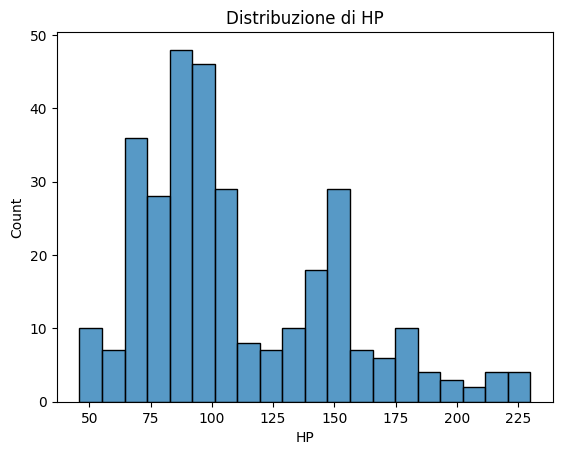

In [9]:
# Histogram of a variable
# Use either Matplotlib.Pyplot hist() or Seaborn histplot()
# Your code goes here
sns.histplot(data=df, x='HP', bins=20)
plt.xlabel('HP')
plt.ylabel('Count')
plt.title('Distribuzione di HP')
plt.show()

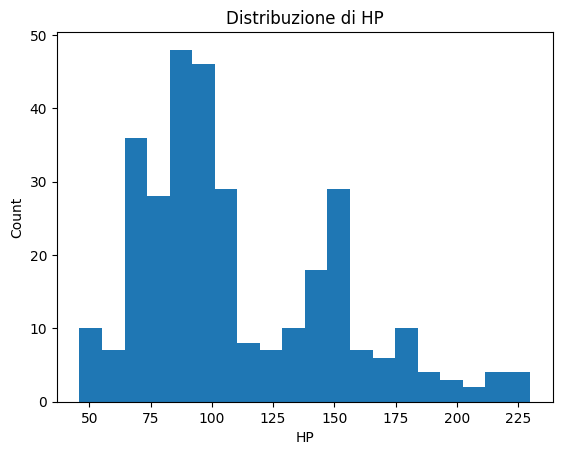

In [10]:
plt.hist(df['HP'], bins=20)
plt.xlabel('HP')
plt.ylabel('Count')
plt.title('Distribuzione di HP')
plt.show()

Rappresenta la relazione tra la potenza del motore e il consumo di carburante

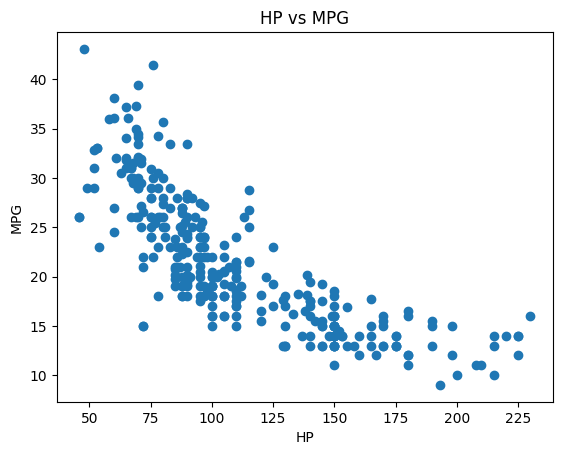

In [11]:
plt.scatter(df['HP'], df['MPG'])
plt.xlabel('HP')
plt.ylabel('MPG')
plt.title('HP vs MPG')
plt.show()

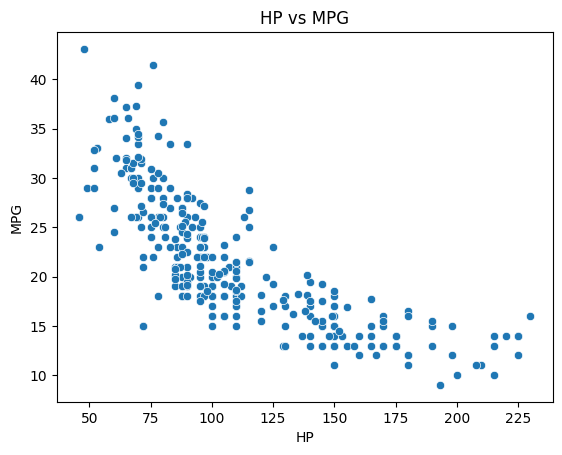

In [12]:
sns.scatterplot(x='HP', y='MPG', data=df)
plt.xlabel('HP')
plt.ylabel('MPG')
plt.title('HP vs MPG')
plt.show()

To overview the distribution of the data, we can use the `pairplot()` function of pandas/seaborn. This function plots pairwise relationships in a dataset. It is a great way to visualize the relationship between multiple variables.

The following is the example for pairplotting using pandas built-in plotting function.

array([[<Axes: xlabel='MPG', ylabel='MPG'>,
        <Axes: xlabel='CYL', ylabel='MPG'>,
        <Axes: xlabel='DIS', ylabel='MPG'>,
        <Axes: xlabel='HP', ylabel='MPG'>,
        <Axes: xlabel='WGT', ylabel='MPG'>,
        <Axes: xlabel='ACC', ylabel='MPG'>,
        <Axes: xlabel='YR', ylabel='MPG'>,
        <Axes: xlabel='ORG', ylabel='MPG'>],
       [<Axes: xlabel='MPG', ylabel='CYL'>,
        <Axes: xlabel='CYL', ylabel='CYL'>,
        <Axes: xlabel='DIS', ylabel='CYL'>,
        <Axes: xlabel='HP', ylabel='CYL'>,
        <Axes: xlabel='WGT', ylabel='CYL'>,
        <Axes: xlabel='ACC', ylabel='CYL'>,
        <Axes: xlabel='YR', ylabel='CYL'>,
        <Axes: xlabel='ORG', ylabel='CYL'>],
       [<Axes: xlabel='MPG', ylabel='DIS'>,
        <Axes: xlabel='CYL', ylabel='DIS'>,
        <Axes: xlabel='DIS', ylabel='DIS'>,
        <Axes: xlabel='HP', ylabel='DIS'>,
        <Axes: xlabel='WGT', ylabel='DIS'>,
        <Axes: xlabel='ACC', ylabel='DIS'>,
        <Axes: xlabel='YR', ylabel=

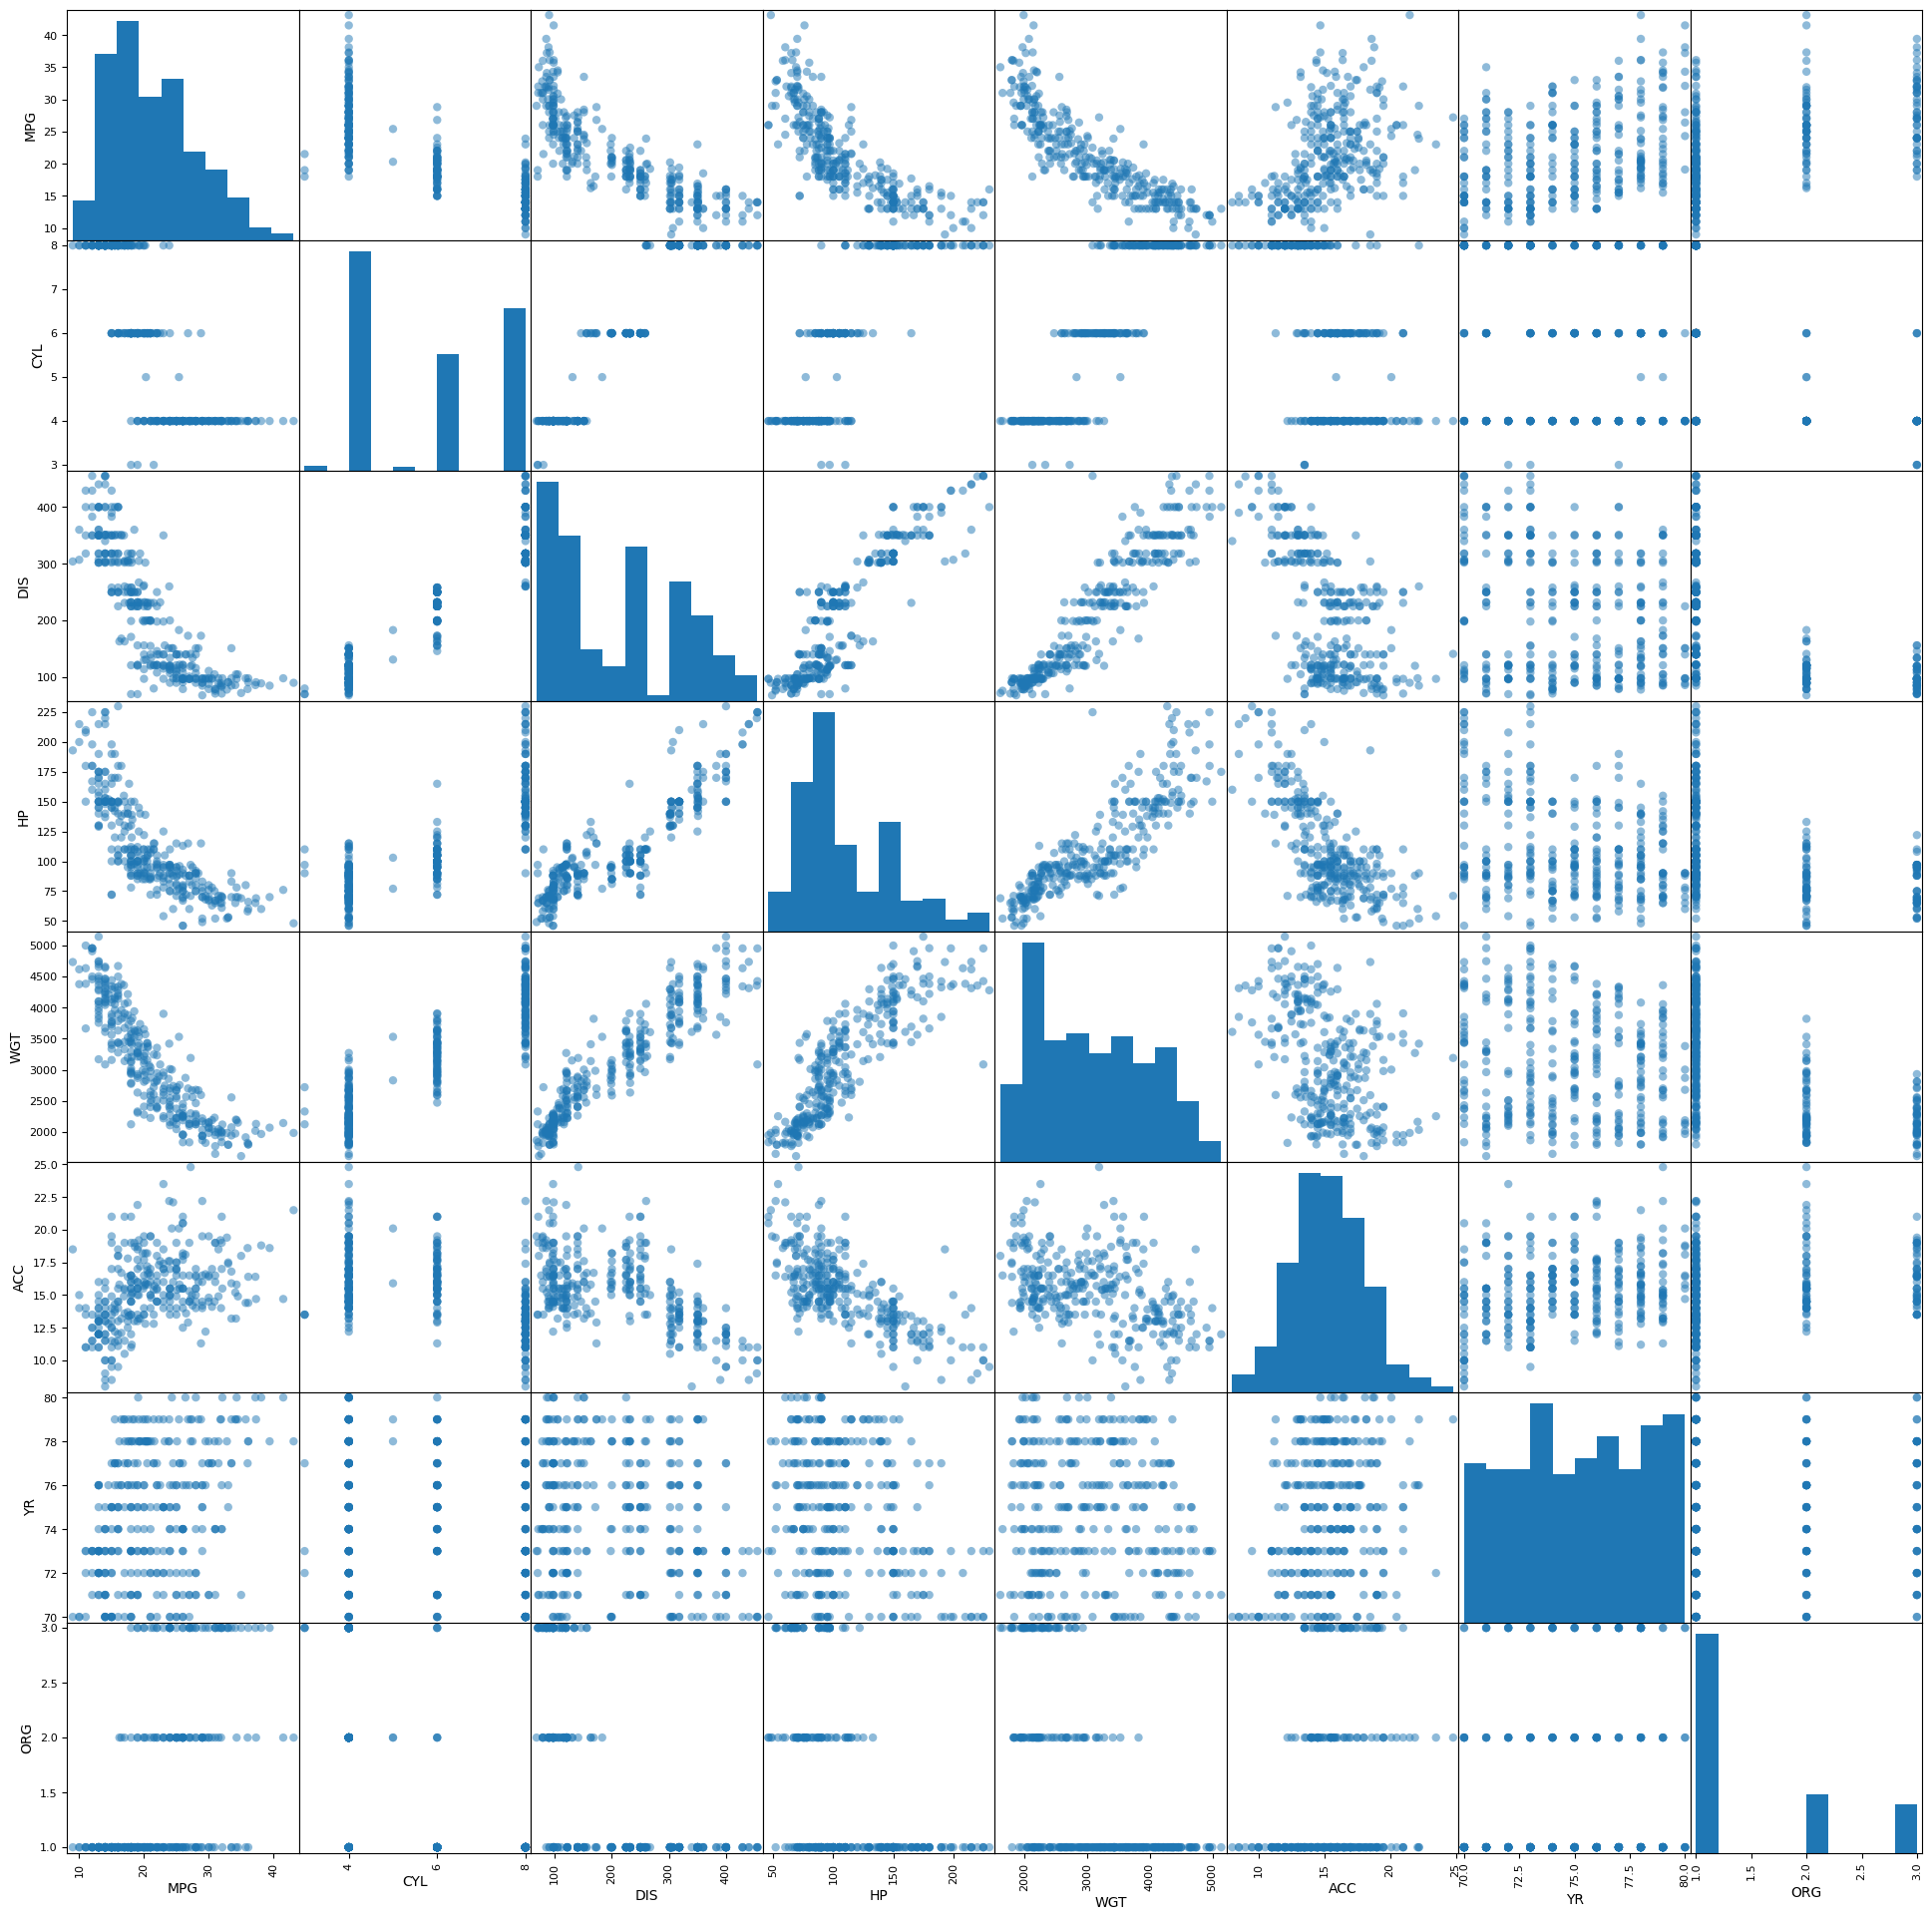

In [13]:
pd.plotting.scatter_matrix(df, figsize=(24,24), marker = 'o')

Perform the same pair plotting using **seaborn** package. Experiment with displot, jointplot functions in seaborn package

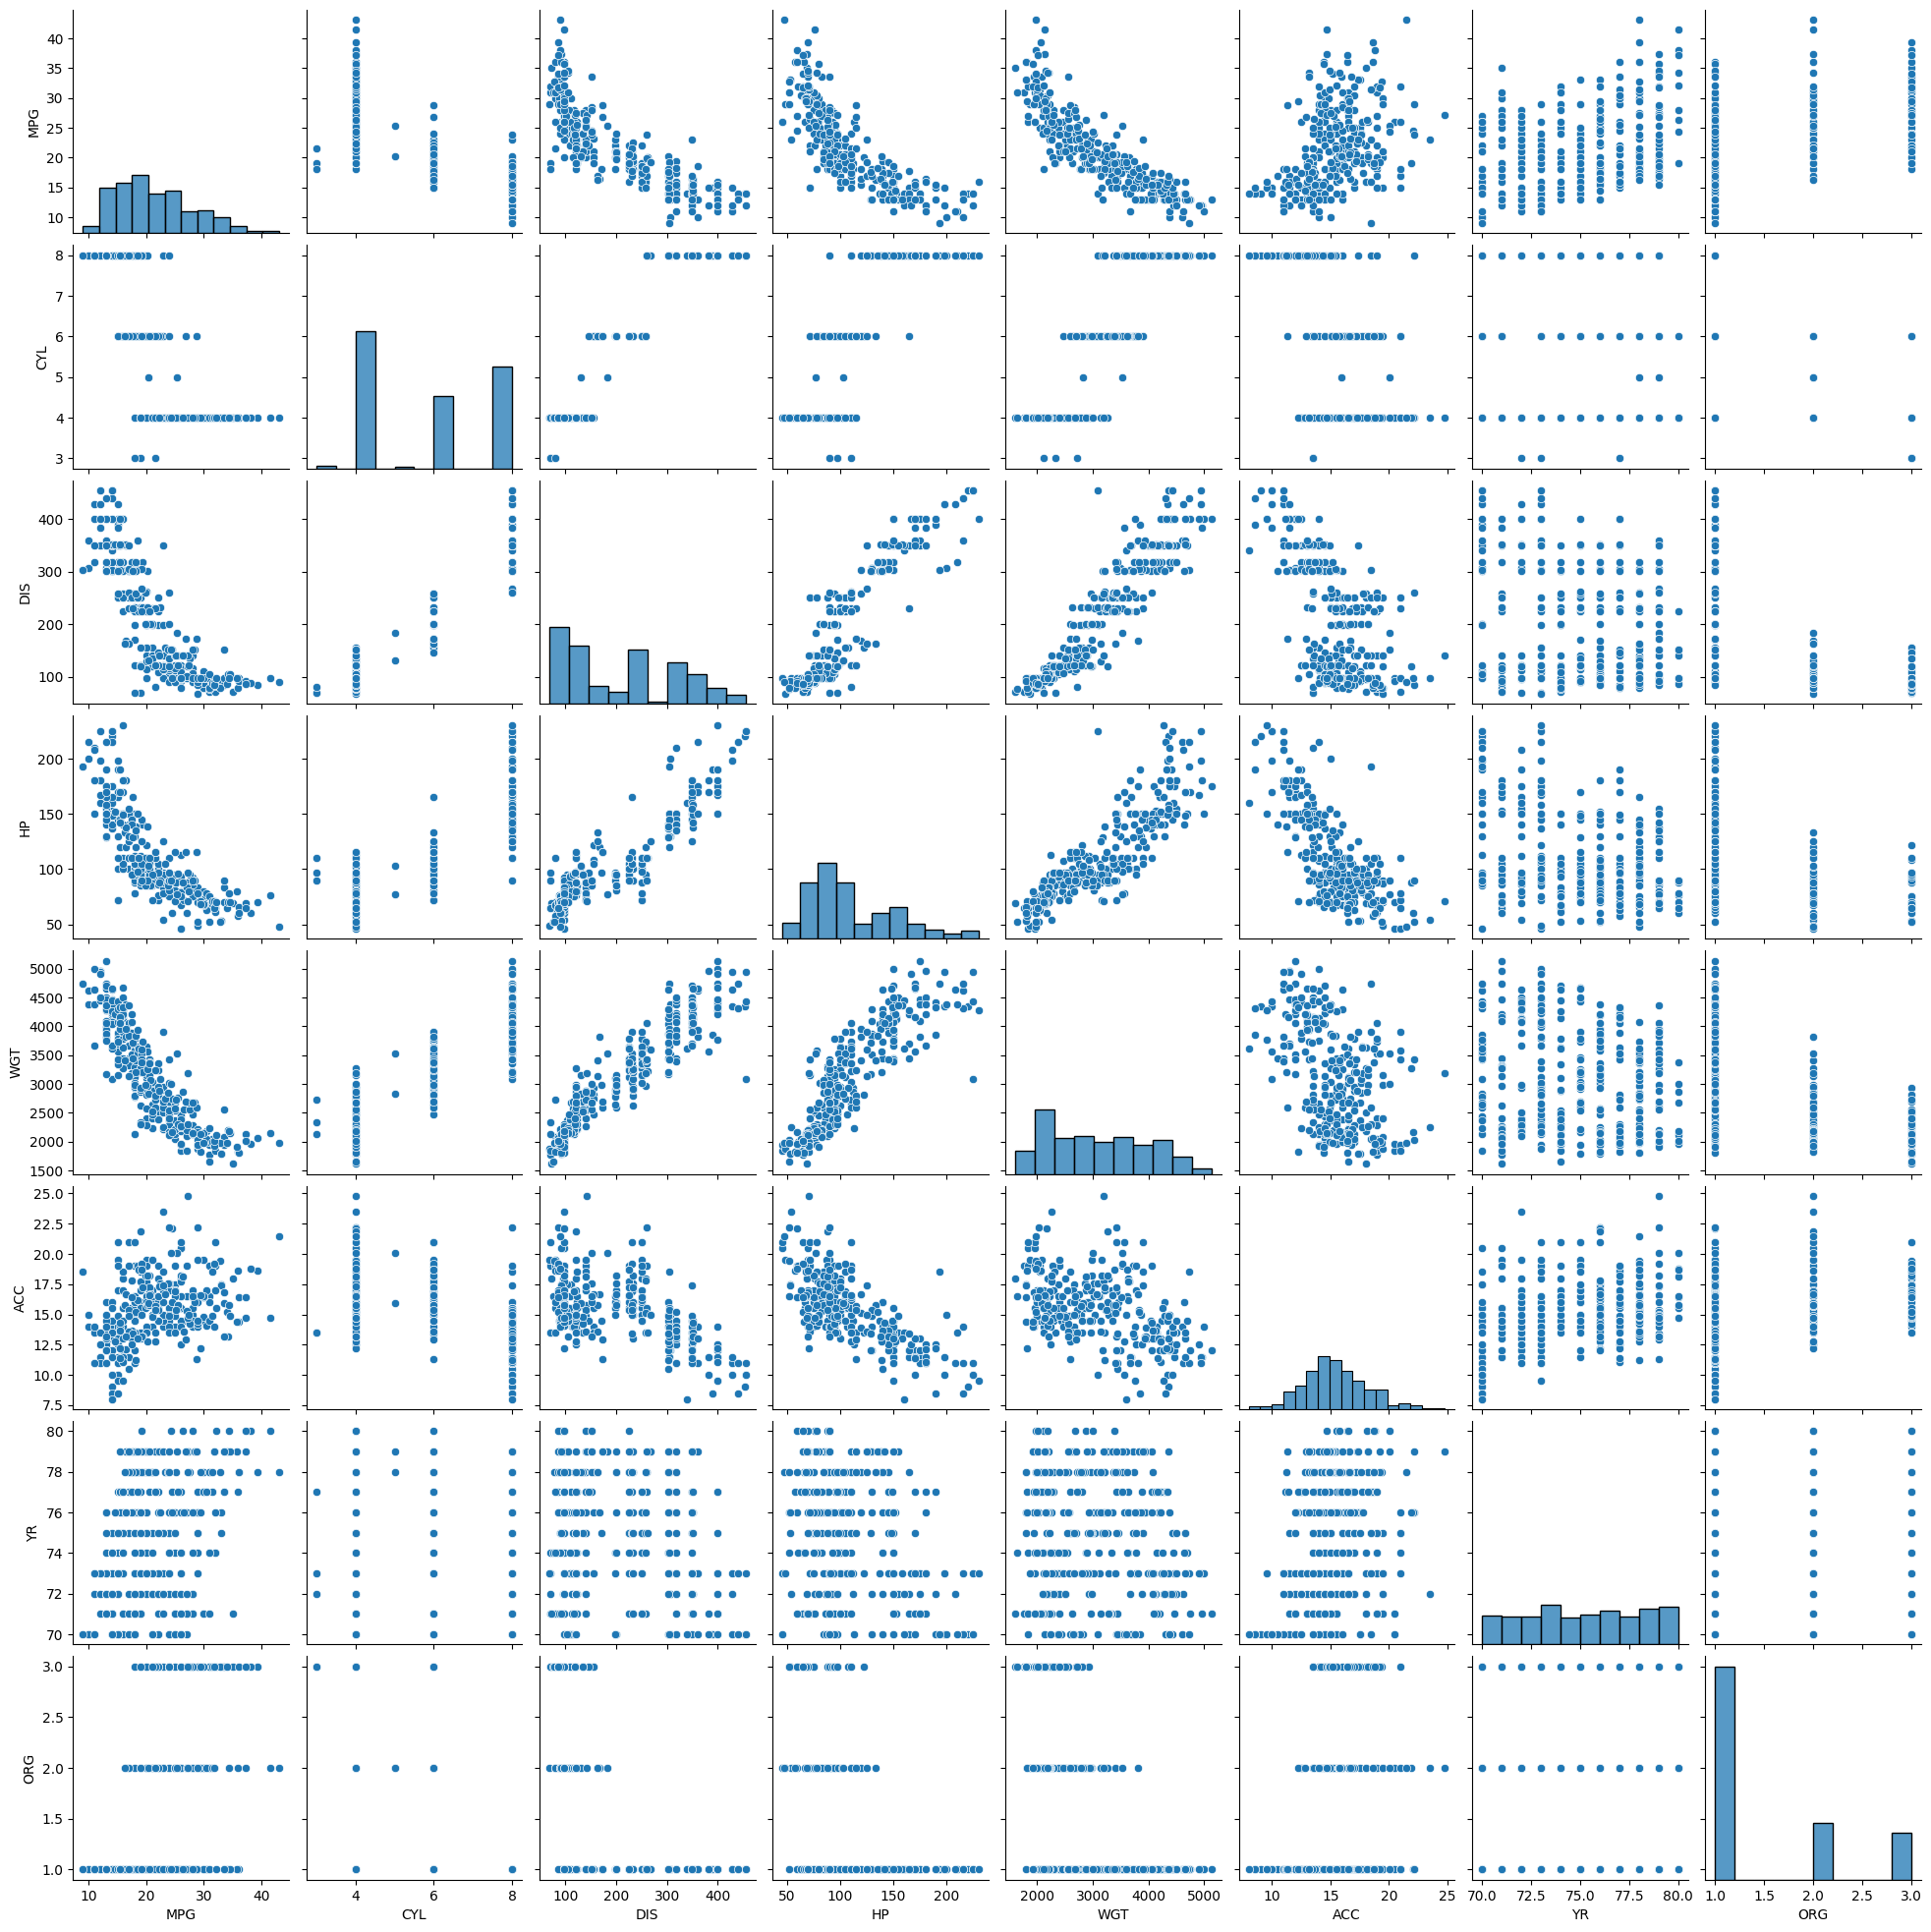

In [14]:
sns.pairplot(df)
plt.show()

### Looking for Correlations

We first need to drop the categorical features from the dataframe.

In [15]:
numerical_features = df.drop('NAME', axis=1)
numerical_features

MPG  CYL    DIS     HP     WGT   ACC  YR  ORG
0    18.0    8  307.0  130.0  3504.0  12.0  70    1
1    15.0    8  350.0  165.0  3693.0  11.5  70    1
2    18.0    8  318.0  150.0  3436.0  11.0  70    1
3    16.0    8  304.0  150.0  3433.0  12.0  70    1
4    17.0    8  302.0  140.0  3449.0  10.5  70    1
..    ...  ...    ...    ...     ...   ...  ..  ...
313  28.0    4  151.0   90.0  2678.0  16.5  80    1
314  26.4    4  140.0   88.0  2870.0  18.1  80    1
315  24.3    4  151.0   90.0  3003.0  20.1  80    1
316  19.1    6  225.0   90.0  3381.0  18.7  80    1
317  34.3    4   97.0   78.0  2188.0  15.8  80    2

[318 rows x 8 columns]

Since the dataset is small, we can compute the standard correlation coefficient (also called Pearson's r) between every pair of attributes using the `corr()` function of pandas.

<ipython-input-16-fc9dd64c2d68>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


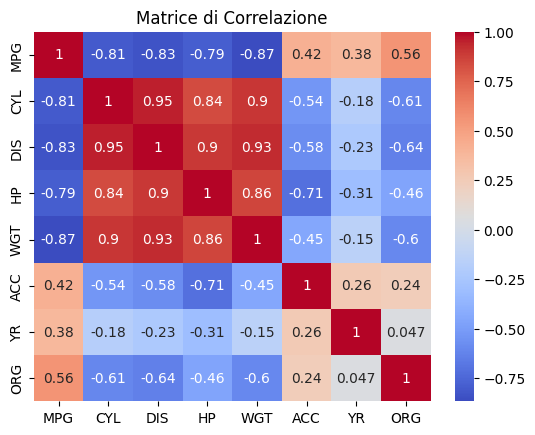

In [16]:
# Your code goes here
# Compute the correlation matrix using corr()
# Visualize the correlation matrix using seaborn function heatmap()

# Calcola la matrice di correlazione tra le variabili del dataset
corr_matrix = df.corr()

# Visualizza la matrice di correlazione come una heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice di Correlazione')
plt.show()

## Data processing

After performing EDA on the dataset, the next step is to preprocess the data to make it suitable for the machine learning model.

### Handling missing values

Most machine learning algorithms cannot work with missing features. So, we need to check if there are any missing values in the dataset.

You can use the `isna()` function to check for NaN values.

In [17]:
# Conta il numero di valori mancanti (NaN) in ogni colonna
num_missing = df.isna().sum()
num_missing

MPG     0
CYL     0
DIS     0
HP      2
WGT     0
ACC     0
YR      0
ORG     0
NAME    0
dtype: int64

If you find any NaN Values in the dataframe you have three options:
1. Get rid of the corresponding indices (rows). Use the `dropna()` function of pandas.
2. Get rid of the whole attribute (column). Use the `drop()` function of pandas.
3. Set the values to some value (zero, mean, median, etc.). Use the `fillna()` function of pandas.

Here, we will use the `dropna()` function to drop the rows with missing values.

In [18]:
df = df.dropna()

Now there should be no NaN values in the dataframe

In [19]:
num_missing = df.isna().sum()
num_missing

MPG     0
CYL     0
DIS     0
HP      0
WGT     0
ACC     0
YR      0
ORG     0
NAME    0
dtype: int64

### Handling categorical features
Linear regression models require numerical values for the features. The categorical features in the dataset need to be encoded as numerical values. There are different ways to encode categorical features, such as:
1. Label Encoding: assigning a numerical value to each category. (n categories -> 1 attribute). This is not a good approach for linear regression models, since the model will assume that two nearby values are more similar than two distant values.
2. One-Hot Encoding: creating a new binary attribute for each category. (n categories -> n binary attributes)
3. Dummy Encoding: creating a new binary attribute for each category and dropping the first category. (n categories -> n-1 binary attributes)

Let's see an example.

In [20]:
# New dataframe with categorical variables
df_cat = pd.DataFrame({'color': ['red', 'green', 'blue', 'green', 'red', 'blue'],
                       'size': ['S', 'M', 'L', 'M', 'S', 'L'],
                       'price': [10, 20, 30, 25, 15, 35]})
df_cat

color size  price
0    red    S     10
1  green    M     20
2   blue    L     30
3  green    M     25
4    red    S     15
5   blue    L     35

In [21]:

df_cat_1hot = pd.get_dummies(df_cat)
df_cat_1hot



price  color_blue  color_green  color_red  size_L  size_M  size_S
0     10           0            0          1       0       0       1
1     20           0            1          0       0       1       0
2     30           1            0          0       1       0       0
3     25           0            1          0       0       1       0
4     15           0            0          1       0       0       1
5     35           1            0          0       1       0       0

In [23]:
df_cat_dummy = pd.get_dummies(df_cat, drop_first=True)
df_cat_dummy

price  color_green  color_red  size_M  size_S
0     10            0          1       0       1
1     20            1          0       1       0
2     30            0          0       0       0
3     25            1          0       1       0
4     15            0          1       0       1
5     35            0          0       0       0

## Feature selection

We want to predict the `MPG` of the car using linear regression. By analyzing the pair plots and the correlation heatmap choose one or more features (even all) to use.

In [46]:
# Example
X = df[['HP']]  # 'CYL' , 'DIS', 'HP', 'WGT', 'ACC', 'YR', 'ORG' Selecting multiple features
X = np.array(X)
if len(X.shape) == 1:
    X = X.reshape(-1, 1)

y = df['MPG']  # Selecting the target feature
y = np.array(y).reshape(-1, 1)

print(X.shape,y.shape)

assert X.shape[0] == y.shape[0], f"X and y should have the same number of samples, but got {X.shape[0]} and {y.shape[0]}"
assert len(X.shape) == 2, f"X should be a 2D array with shape (n_samples, n_features), but got {X.shape}"
assert len(y.shape) == 2, f"y should be a 2D array with shape (n_samples, 1), but got {y.shape}"

(316, 1) (316, 1)


## Data Splitting
To evaluate the performance of our model, we need to split the dataset into training and testing sets. The training set is used to fit the model, while the testing set is used to evaluate the model's performance on new, unseen data.

We can use the `train_test_split()` function from scikit-learn to split the data into training and testing sets.
The `test_size` parameter specifies the proportion of the data that should be allocated to the testing set. In this case, we will set it to 0.2, which means that 20% of the data will be used for testing.
The `random_state` parameter is used to set the random seed, which ensures that we get the same split every time we run the code. Set it to 42, which is the answer to the ultimate question of life, the universe, and everything.

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(252, 1) (64, 1) (252, 1) (64, 1)


### Scaling the data
Linear regression models are sensitive to the scale of the data, and it is essential to scale the data before training the model. There are two common ways to scale the data:
1. Min-max Normalisation: subtract the minimum value and divide by the difference between the maximum and minimum values. (x - min) / (max - min)
2. Standardization: subtract the mean and divide by the standard deviation. (x - mean) / std

We will use the `StandardScaler` class from scikit-learn to standardize the data.
Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set using `fit_transform()`. Mean and standard deviation are then stored to be used on the test data using `transform()`.

In [48]:
# Before scaling
X_train[:5]

array([[108.],
       [148.],
       [225.],
       [145.],
       [112.]])

In [49]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [50]:
# After scaling
X_train[:5]

array([[-0.07515539],
       [ 0.94171223],
       [ 2.8991824 ],
       [ 0.86544716],
       [ 0.02653137]])

## Linear Regression
We will use the LinearRegression class from scikit-learn to build a linear regression model. The LinearRegression class is a simple and powerful tool for linear regression analysis.



The `LinearRegression` estimator in addition to simple straight-line fits (in case of one feature $x_1$), can also handle multidimensional linear models of the form
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
where there are multiple $x$ values.
Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize, but the general idea is the same: we are trying to find the best fit line (or plane, or hyper-plane) that describes the data.

In [51]:
from sklearn.linear_model import LinearRegression
# Creazione dell'istanza del modello di regressione lineare
model = LinearRegression()

# Addestramento del modello sui dati
model.fit(X_train, y_train)

LinearRegression()

In [52]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     [-5.25026821]
Model intercept: [21.18809524]


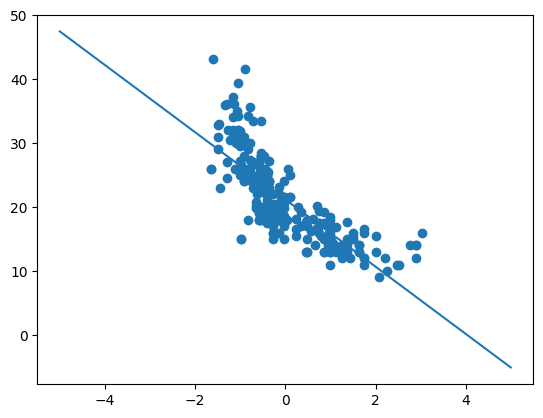

In [53]:
# In the case of linear regression with one feature, we can plot the model
xfit = np.linspace(-5, 5)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(X_train, y_train)
plt.plot(xfit, yfit)

## Model Evaluation
We will use the mean squared error (MSE), and the mean absolute error (MAE) to evaluate the performance of the model on the testing set.

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict the target variable using the testing data
y_pred = model.predict(X_test)

# Compute the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Compute the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

Mean Squared Error: 16.61
Mean Absolute Error: 3.34


## Task 1
Design a generic linear regression solution using the knowledge acquired so far.
If you are unsure on the solution to this lab, start with a simple working solution (e.g. using for loops).
Then implement the vectorized solution. Compare the two using time() to measure the processing time.

### Fill the following code blocks with your code

In [81]:
#-----------------------------------------------------
# Hypothesis function
#-----------------------------------------------------

def hyp(X, w):
    '''
    :param X: Design matrix
    :param w: Linear regression weights
    :return: the value of the hypothesis function for each row of X
    '''

    return np.dot(X, w) # moltiplicazione tra X e il vettore dei pesi w


In [82]:
#-----------------------------------------------------
# Cost function
#-----------------------------------------------------

def cost(y, X, w):
    '''
    :param y: Target values
    :param X: Design matrix
    :param w: Linear regression weights
    :return: The cost function for the given input data
    '''

    m = len(y) # numero di campioni

    cost_value = 0

    for i in range(m):
        prediction = hyp(X[i], w)
        error = prediction - y[i]
        squared_error = error ** 2
        cost_value += squared_error

    # Divide the cost by 2m
    cost_value /= (2 * m)

    return cost_value

In [84]:
#-----------------------------------------------------
# Linear regression solver - Gradient Descent
#-----------------------------------------------------
def linear_regression_fit_gd(y, X, alpha, epsilon=0.001):
    '''
    :param y:
    :param X:
    :param epsilon:
    :return:
    '''

    num_features = X.shape[1]
    num_samples = X.shape[0]

    w_hat = np.zeros((num_features, 1))

    cost_val = cost(y, X, w_hat)
    prev_cost = cost_val + epsilon + 1

    while np.abs(prev_cost - cost_val) > epsilon:

        predictions = hyp(X, w_hat)

        errors = predictions - y

        gradient = (1 / num_samples) * X.T.dot(errors)

        w_hat = w_hat - alpha * gradient

        prev_cost = cost_val
        cost_val = cost(y, X, w_hat)

    return w_hat

In [93]:
#-----------------------------------------------------
# Linear regression solver - Normal Equation
#-----------------------------------------------------
def linear_regression_fit_ne(y, X):
    '''
    :param y:
    :param X:
    :param epsilon:
    :return:
    '''

    # Calcola i pesi utilizzando l'equazione normale
    X_transpose = np.transpose(X)
    X_transpose_X = np.dot(X_transpose, X)
    X_transpose_y = np.dot(X_transpose, y)
    w_hat = np.linalg.solve(X_transpose_X, X_transpose_y) #I pesi stimati w_hat vengono calcolati risolvendo l'equazione normale

    return w_hat

Evaluate your functions with the data and check the error using the following code.

In [94]:
# Train with Gradient Descent
w_hat_gd = linear_regression_fit_gd(y_train, X_train, alpha=0.1)
print('w_hat_gd = ', w_hat_gd)

# Train with Normal Equation
w_hat_ne= linear_regression_fit_ne(y_train, X_train)
print('w_hat_ne = ', w_hat_ne)

y_te_hat = hyp(X_test, w_hat_ne)
print("Predicted values = ", y_te_hat)

# Train and test
print("Error on train (RMSE) = ", np.sqrt(cost(y_train, X_train, w_hat_ne)))
print("Error on test (RMSE) = ", np.sqrt(cost(y_test, X_test, w_hat_ne)))
print("Error on total set (RMSE) = ", np.sqrt(cost(y, X, w_hat_ne)))

w_hat_gd =  [[-5.16404199]]
w_hat_ne =  [[-5.25026821]]
Predicted values =  [[  5.46647235]
 [  0.79499806]
 [  4.79911888]
 [  5.59994304]
 [-13.88677827]
 [ -3.74300553]
 [-13.88677827]
 [-10.55001092]
 [ -5.21118317]
 [  4.13176541]
 [  4.79911888]
 [  5.46647235]
 [  7.73547415]
 [  3.33094125]
 [  4.79911888]
 [  5.46647235]
 [  0.12764459]
 [  4.3987068 ]
 [  3.33094125]
 [ -7.88059704]
 [-11.61777647]
 [  0.12764459]
 [  3.73135333]
 [  3.06399986]
 [ -1.87441582]
 [  2.129705  ]
 [ -0.1392968 ]
 [  5.86688443]
 [  4.66564819]
 [  5.59994304]
 [  6.80117929]
 [ -3.87647623]
 [  4.13176541]
 [  4.3987068 ]
 [  2.79705847]
 [  5.73341374]
 [  2.79705847]
 [ -5.21118317]
 [  1.06193945]
 [  3.46441194]
 [ -4.5438297 ]
 [ -7.88059704]
 [ -8.54795051]
 [  3.19747055]
 [  1.46235153]
 [  5.19953096]
 [  3.46441194]
 [  2.53011708]
 [ -0.53970888]
 [ -5.21118317]
 [  2.79705847]
 [ -3.87647623]
 [ -5.21118317]
 [  5.19953096]
 [ -5.21118317]
 [  8.26935692]
 [ -0.53970888]
 [-13.886778

## Task 2
1. Perform EDA on another dataset of your choice. You can find a few in the GitHub repo.
2. Build a linear regression model to predict the target variable.
3. Try to use a different number of features and experiment with regularization. You can use the `Ridge`, `Lasso`, and `ElasticNet` classes from scikit-learn.
4. Evaluate the performance of the model using the metrics discussed above.

La regressione Ridge è un modello di regressione lineare con regolarizzazione L2. Aggiunge un termine di penalità alla funzione di perdita proporzionale alla somma dei quadrati dei coefficienti del modello

In [99]:
!wget -O redWine.csv https://raw.githubusercontent.com/Sapienza-AI-Lab/esercitazione5-22-23/main/data/Wine_quality/winequality-red_tr.csv


df2 = pd.read_csv('redWine.csv')

--2023-07-16 13:26:21--  https://raw.githubusercontent.com/Sapienza-AI-Lab/esercitazione5-22-23/main/data/Wine_quality/winequality-red_tr.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73465 (72K) [text/plain]
Saving to: ‘redWine.csv’

redWine.csv         100%[===================>]  71.74K  --.-KB/s    in 0.02s   

2023-07-16 13:26:21 (4.16 MB/s) - ‘redWine.csv’ saved [73465/73465]



In [100]:
df2.shape

(1279, 12)

In [101]:
# Visualizza le prime 5 righe del dataframe
df2.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [105]:
df2.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [106]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1279 entries, 0 to 1278
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1279 non-null   float64
 1   volatile acidity      1279 non-null   float64
 2   citric acid           1279 non-null   float64
 3   residual sugar        1279 non-null   float64
 4   chlorides             1279 non-null   float64
 5   free sulfur dioxide   1279 non-null   float64
 6   total sulfur dioxide  1279 non-null   float64
 7   density               1279 non-null   float64
 8   pH                    1279 non-null   float64
 9   sulphates             1279 non-null   float64
 10  alcohol               1279 non-null   float64
 11  quality               1279 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 120.0 KB


In [107]:
df2.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1279.000000       1279.000000  1279.000000     1279.000000   
mean        8.576935          0.519156     0.289218        2.562002   
std         1.769355          0.177958     0.196498        1.311930   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.300000          0.390000     0.120000        1.900000   
50%         8.200000          0.500000     0.280000        2.200000   
75%         9.600000          0.630000     0.450000        2.600000   
max        15.900000          1.330000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1279.000000           1279.00000           1279.000000  1279.000000   
mean      0.088859             15.45817             46.824081     0.996972   
std       0.047909             10.31869             33.589059     0.001893   
min       0.012000              1.00000              6.000000     0.990070   
25%       0.071000              7.00000             21.000000     0.995900   
50%       0.080000             13.00000             38.000000     0.997000   
75%       0.092000             21.00000             63.000000     0.998030   
max       0.611000             72.00000            289.000000     1.003200   

                pH    sulphates      alcohol      quality  
count  1279.000000  1279.000000  1279.000000  1279.000000  
mean      3.299765     0.663784    10.399531     5.663800  
std       0.155144     0.174078     1.095966     0.812382  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.200000     0.560000     9.500000     5.000000  
50%       3.300000     0.620000    10.100000     6.000000  
75%       3.395000     0.730000    11.100000     6.000000  
max       3.900000     2.000000    14.900000     8.000000

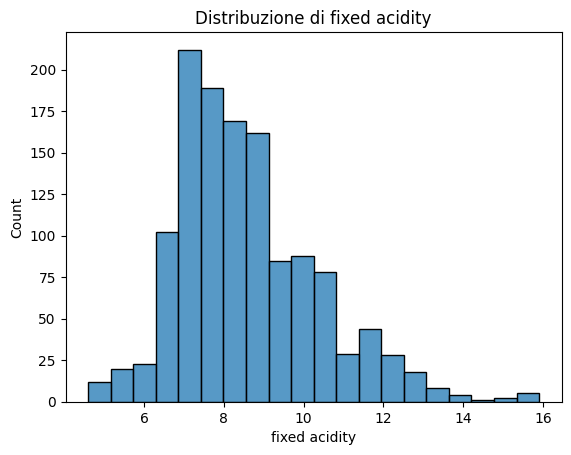

In [128]:
sns.histplot(data=df2, x='fixed acidity', bins=20)
plt.xlabel('fixed acidity')
plt.ylabel('Count')
plt.title('Distribuzione di fixed acidity')
plt.show()

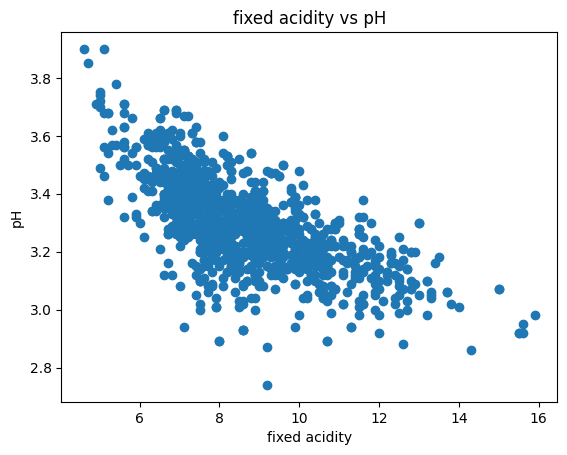

In [129]:
plt.scatter(df2['fixed acidity'], df2['pH'])
plt.xlabel('fixed acidity')
plt.ylabel('pH')
plt.title('fixed acidity vs pH')
plt.show()

array([[<Axes: xlabel='fixed acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='citric acid', ylabel='fixed acidity'>,
        <Axes: xlabel='residual sugar', ylabel='fixed acidity'>,
        <Axes: xlabel='chlorides', ylabel='fixed acidity'>,
        <Axes: xlabel='free sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='total sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='density', ylabel='fixed acidity'>,
        <Axes: xlabel='pH', ylabel='fixed acidity'>,
        <Axes: xlabel='sulphates', ylabel='fixed acidity'>,
        <Axes: xlabel='alcohol', ylabel='fixed acidity'>,
        <Axes: xlabel='quality', ylabel='fixed acidity'>],
       [<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='citric acid', ylabel='volatile acidity'>,
        <Axes: xlabel='residual sugar', ylabel='vol

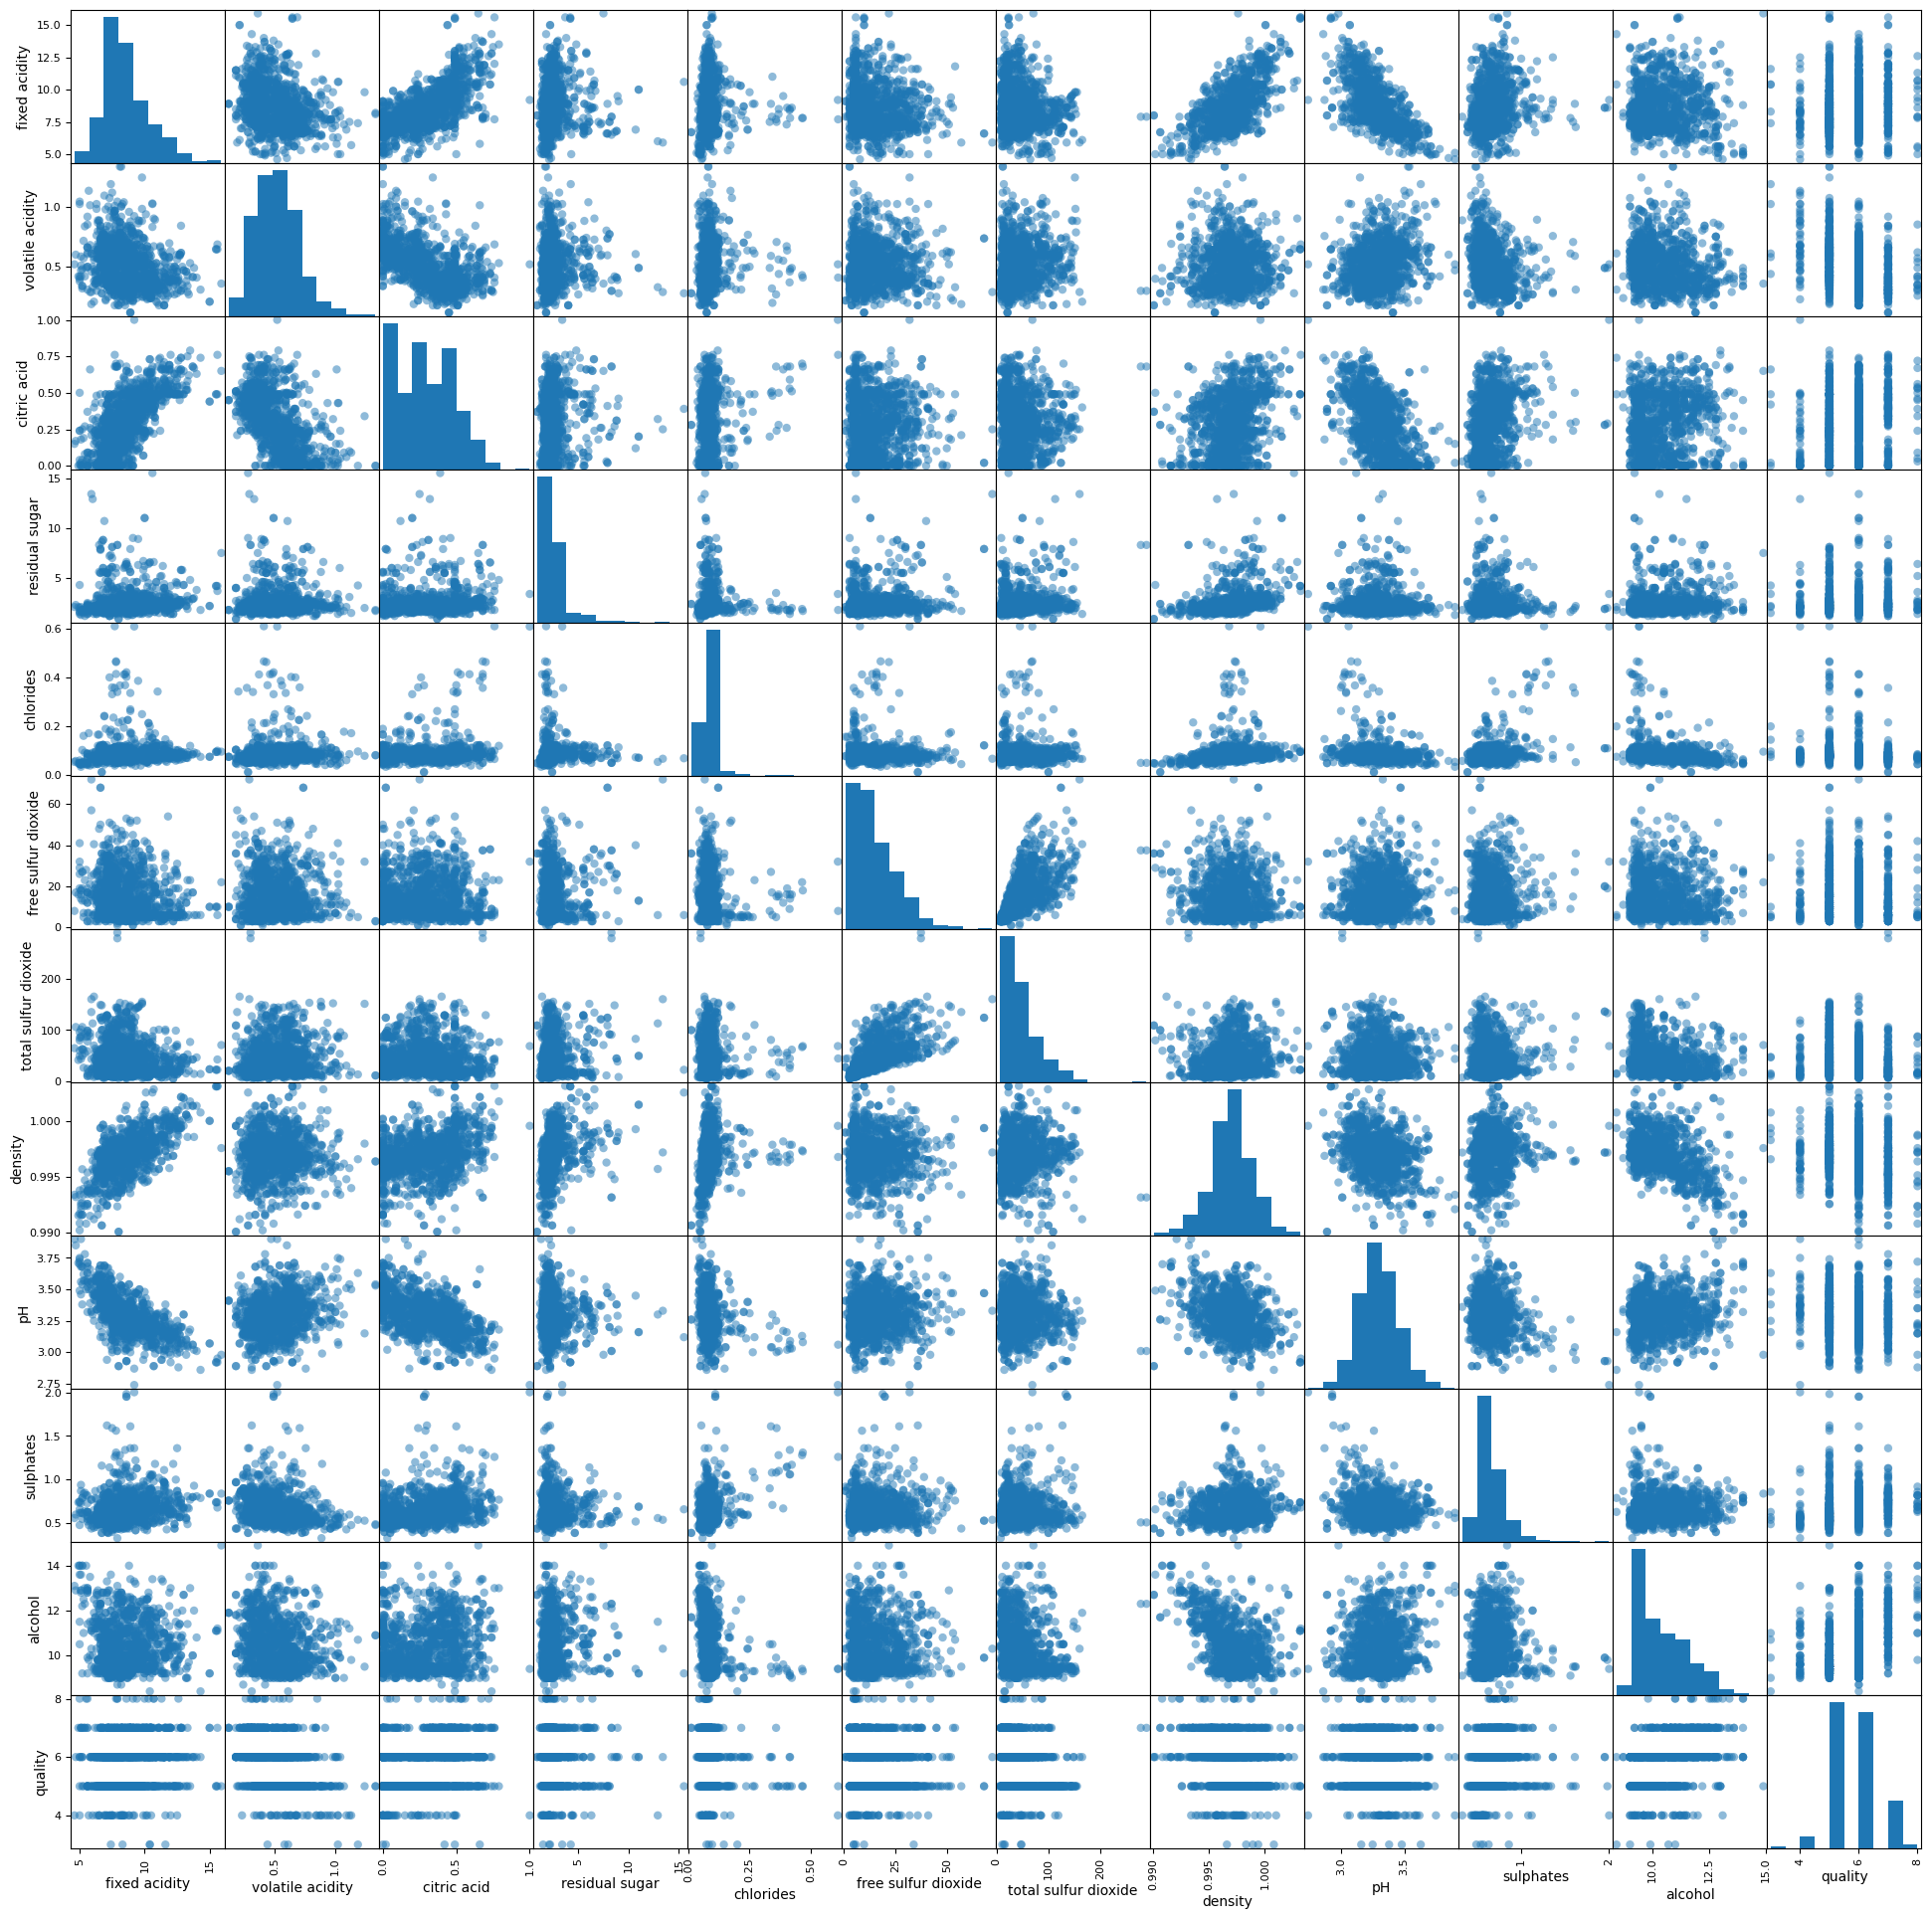

In [127]:
pd.plotting.scatter_matrix(df2, figsize=(24,24), marker = 'o')

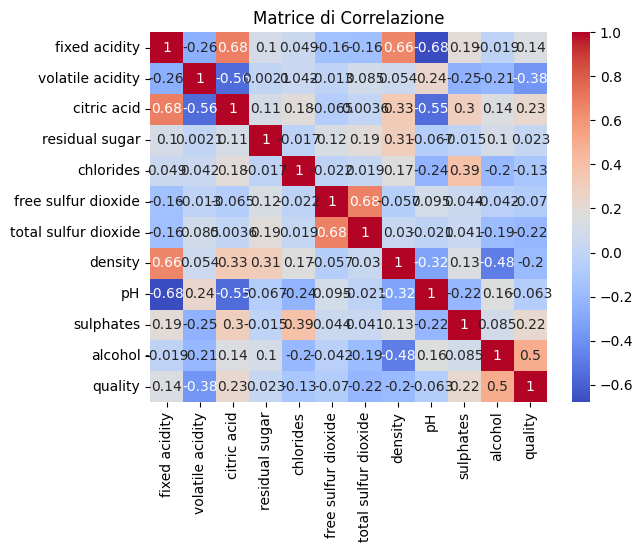

In [144]:
corr_matrix = df2.corr()

# Visualizza la matrice di correlazione come una heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice di Correlazione')
plt.show()

In [145]:
# Conta il numero di valori mancanti (NaN) in ogni colonna
num_missing = df2.isna().sum()
num_missing

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [146]:
# Example
X = df2[['fixed acidity']]
X = np.array(X)
if len(X.shape) == 1:
    X = X.reshape(-1, 1)

y = df2['pH']  # Selecting the target feature
y = np.array(y).reshape(-1, 1)

print(X.shape,y.shape)

assert X.shape[0] == y.shape[0], f"X and y should have the same number of samples, but got {X.shape[0]} and {y.shape[0]}"
assert len(X.shape) == 2, f"X should be a 2D array with shape (n_samples, n_features), but got {X.shape}"
assert len(y.shape) == 2, f"y should be a 2D array with shape (n_samples, 1), but got {y.shape}"

(1279, 1) (1279, 1)


In [147]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1023, 1) (256, 1) (1023, 1) (256, 1)


In [148]:
X_train[:5]

array([[9.1],
       [8.2],
       [9.2],
       [6.5],
       [7.1]])

In [149]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [150]:
X_train[:5]

array([[ 0.29509749],
       [-0.22153354],
       [ 0.35250094],
       [-1.19739215],
       [-0.85297146]])

In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

modelR = Ridge(alpha=1.0)

modelR.fit(X_train, y_train)


Ridge()

In [157]:
modelLR = LinearRegression()

# Addestramento del modello sui dati
modelLR.fit(X_train, y_train)

LinearRegression()

In [158]:
print("ModelLR slope:    ", modelLR.coef_[0])
print("ModelLR intercept:", modelLR.intercept_)

ModelLR slope:     [-0.1038261]
ModelLR intercept: [3.29938416]


In [159]:
print("ModelR slope:    ", modelR.coef_[0])
print("ModelR intercept:", modelR.intercept_)

ModelR slope:     [-0.1037247]
ModelR intercept: [3.29938416]


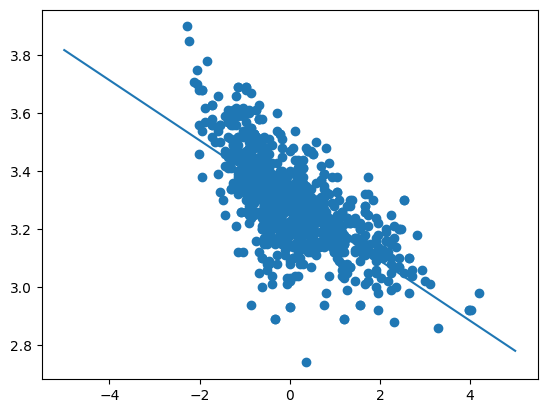

In [162]:
# In the case of linear regression with one feature, we can plot the model
xfitLR = np.linspace(-5, 5)
yfitLR = modelLR.predict(xfit[:, np.newaxis])

plt.scatter(X_train, y_train)
plt.plot(xfitLR, yfitLR)

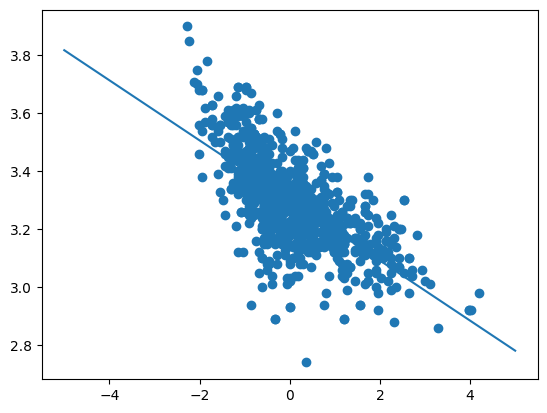

In [161]:
xfitR = np.linspace(-5, 5)
yfitR = modelR.predict(xfit[:, np.newaxis])

plt.scatter(X_train, y_train)
plt.plot(xfitR, yfitR)

In [163]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict the target variable using the testing data
y_predLR = modelLR.predict(X_test)
y_predR = modelR.predict(X_test)

# Compute the mean squared error
mse = mean_squared_error(y_test, y_predLR)
print(f"Mean Squared Error LR: {mse:.2f}")
mse = mean_squared_error(y_test, y_predR)
print(f"Mean Squared Error R: {mse:.2f}")


# Compute the mean absolute error
mae = mean_absolute_error(y_test, y_predLR)
print(f"Mean Absolute Error LR: {mae:.2f}")
mae = mean_absolute_error(y_test, y_predR)
print(f"Mean Absolute Error R: {mae:.2f}")

Mean Squared Error LR: 0.01
Mean Squared Error R: 0.01
Mean Absolute Error LR: 0.09
Mean Absolute Error R: 0.09
